In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
musica = pd.read_excel('top10s.xlsx')

del musica['title']
del musica['artist']
del musica['top genre']

data = pd.DataFrame(musica)

data

,Num,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,2010,97,89,67,-4,8,80,217,19,4,83
1,2,2010,87,93,75,-5,52,64,263,24,23,82
2,3,2010,120,84,76,-3,29,71,200,10,14,80
3,4,2010,119,92,70,-4,8,71,295,0,4,79
4,5,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,2019,104,66,61,-7,20,16,176,1,3,75
598,599,2019,95,79,75,-6,7,61,206,21,12,75
599,600,2019,136,76,53,-5,9,65,260,7,34,70
600,601,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
def regress(y,x):
    X_cp = sm.add_constant(x)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    
    return results

In [4]:
data.describe()

,Num,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,301.500000,2014.586379,118.568106,70.478405,64.370432,-5.579734,17.800664,52.157807,224.687708,14.347176,8.355482,66.501661
std,173.926709,2.605513,24.809816,16.311966,13.387878,2.800247,13.097616,22.470169,34.157005,20.777341,7.489085,14.522259
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.250000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,301.500000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,451.750000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.750000,17.000000,9.000000,76.000000
max,602.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [5]:
data.isnull().sum()

Num      0
year     0
bpm      0
nrgy     0
dnce     0
dB       0
live     0
val      0
dur      0
acous    0
spch     0
pop      0
dtype: int64

In [6]:
#sns.pairplot(data, height=1.5);

In [7]:
x = data['pop']
y = data[['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch']]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
y, x, test_size=0.2, random_state=42)

results = regress(y_train,x_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     4.628
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           2.66e-06
Time:                        15:05:19   Log-Likelihood:                -1937.4
No. Observations:                 481   AIC:                             3897.
Df Residuals:                     470   BIC:                             3943.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2669.5575    530.067     -5.036      0.000   -3711.152   -1627.963
year           1.3628      0.262      5.196      0.000       0.847       1.878
bpm            0.0191      0.026      0.734      0.463      -0.032       0.070
nrgy          -0.1215      0.065     -1.872      0.062      -0.249       0.006
dnce           0.0561      0.058      0.973      0.331      -0.057       0.169
dB             1.0134      0.495      2.045      0.041       0.040       1.987
live          -0.0222      0.049     -0.457      0.648      -0.118       0.073
val            0.0332      0.037      0.887      0.376      -0.040       0.107
dur           -0.0064      0.020     -0.325      0.745      -0.045       0.032
acous         -0.0362      0.039     -0.926      0.355      -0.113       0.041
spch          -0.0709      0.086     -0.824      0.410      -0.240       0.098
==============================================================================
Omnibus:                      157.541   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.264
Skew:                          -1.530   Prob(JB):                    2.34e-109
Kurtosis:                       6.950   Cond. No.                     1.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df = data[['year','dB']]

df_train, df_test = train_test_split(
df, test_size=0.2, random_state=42)

resultados = regress(y_train,df_train)
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     18.36
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           2.07e-08
Time:                        15:05:19   Log-Likelihood:                -1942.2
No. Observations:                 481   AIC:                             3890.
Df Residuals:                     478   BIC:                             3903.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2910.5295    498.425     -5.839      0.000   -3889.905   -1931.154
year           1.4796      0.248      5.977      0.000       0.993       1.966
dB             0.6914      0.364      1.900      0.058      -0.024       1.407
==============================================================================
Omnibus:                      153.579   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.207
Skew:                          -1.511   Prob(JB):                    1.58e-101
Kurtosis:                       6.746   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
beta0 = resultados.params[0]  
beta1 = resultados.params[1]  
beta2 = resultados.params[2]

In [11]:
def f(feature1, feature2):
    return beta0 + beta1*feature1 + beta2*feature2

In [12]:
npoints = 100
feature1 = df["year"]
feature2 = df["dB"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [13]:
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [14]:
fit_z = f(eixo_x, eixo_y)

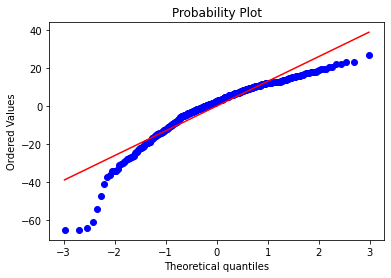

In [15]:
stats.probplot(resultados.resid,dist='norm',plot=plt);

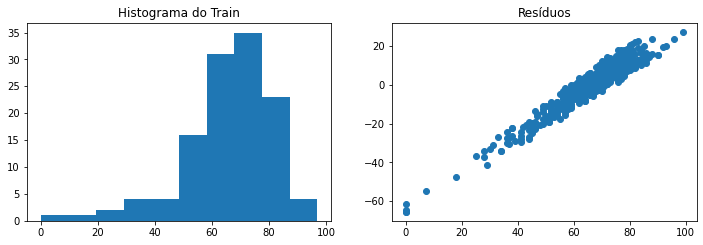

In [16]:
plt.rcParams['figure.figsize'] = (12,8)

plt.subplot(221)
plt.title('Histograma do Train')
plt.hist(y_test);

plt.subplot(222)
plt.title('Resíduos')
plt.scatter(y_train,resultados.resid);

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

results_teste = regress(y_train,x_train)
y_predl = results_teste.predict(sm.add_constant(x_test))
erro = np.sqrt(mean_squared_error(y_test,y_predl))
erro2 = mean_absolute_error(y_test,y_predl)
print(erro,erro2)

14.020376037565226 10.701091204407128


In [18]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100) 

regressor.fit(x_train,y_train)

y_predr = regressor.predict(x_test)

erro = np.sqrt(mean_squared_error(y_test,y_predr))
erro2 = mean_absolute_error(y_test,y_predr)
print(erro,erro2)

14.185234395594406 10.556993801652894


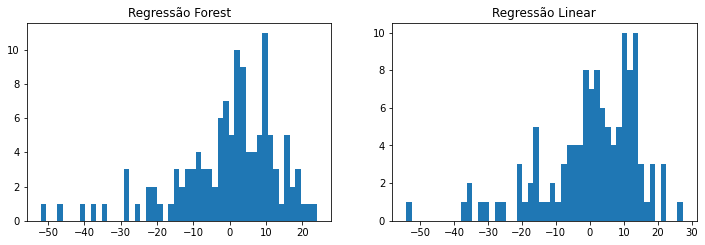

In [19]:
plt.rcParams['figure.figsize'] = (12,8)

#Regressão Forest
plt.subplot(221)
plt.title('Regressão Forest')
plt.hist(y_test - y_predr, bins = 50);

#Regressão Linear
plt.subplot(222)
plt.title('Regressão Linear')
plt.hist(y_test - y_predl, bins = 50);